# Building a Support Vector Machine Classifier to predict Salary Category

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
from functools import cache

In [3]:
df=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\17. Support Vector Machines\SalaryData_Train(1).csv")
test_data=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\17. Support Vector Machines\SalaryData_Test(1).csv")

## Exploratory Data Analysis

In [4]:
df.shape,test_data.shape

((30161, 14), (15060, 14))

In [5]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


No Missing values in the dataset

## Exploring the data by using Seaborn and Matplotlib

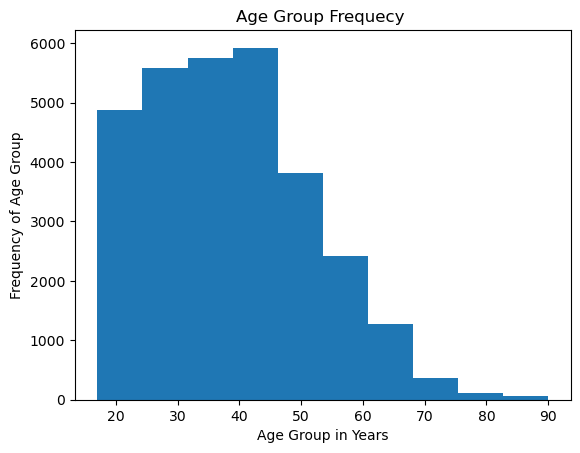

In [8]:
#Exploring the Age group data
plt.hist(df['age'])
plt.xlabel('Age Group in Years')
plt.ylabel('Frequency of Age Group')
plt.title('Age Group Frequecy ')
plt.show()

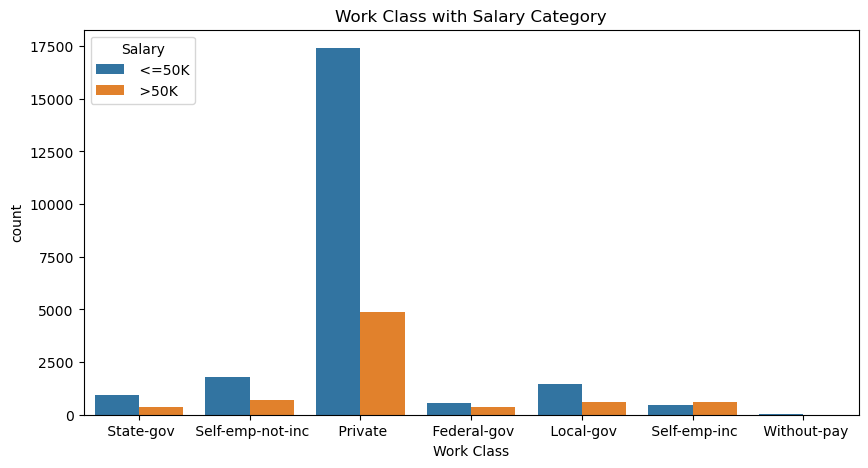

In [9]:
#Exploring the Workclass
fig =plt.figure(figsize=(10,5))
sns.countplot(x='workclass', hue='Salary', data=df)
plt.title('Work Class with Salary Category')
plt.xlabel('Work Class')
plt.show()

### Key Takeaways from the above countplot:

1. The most of the People are belongs to Private Work Class 
2. Most of the people having salary <=50K
3. Privae Work class emplyees are highest number in terms of Salary that is >50k


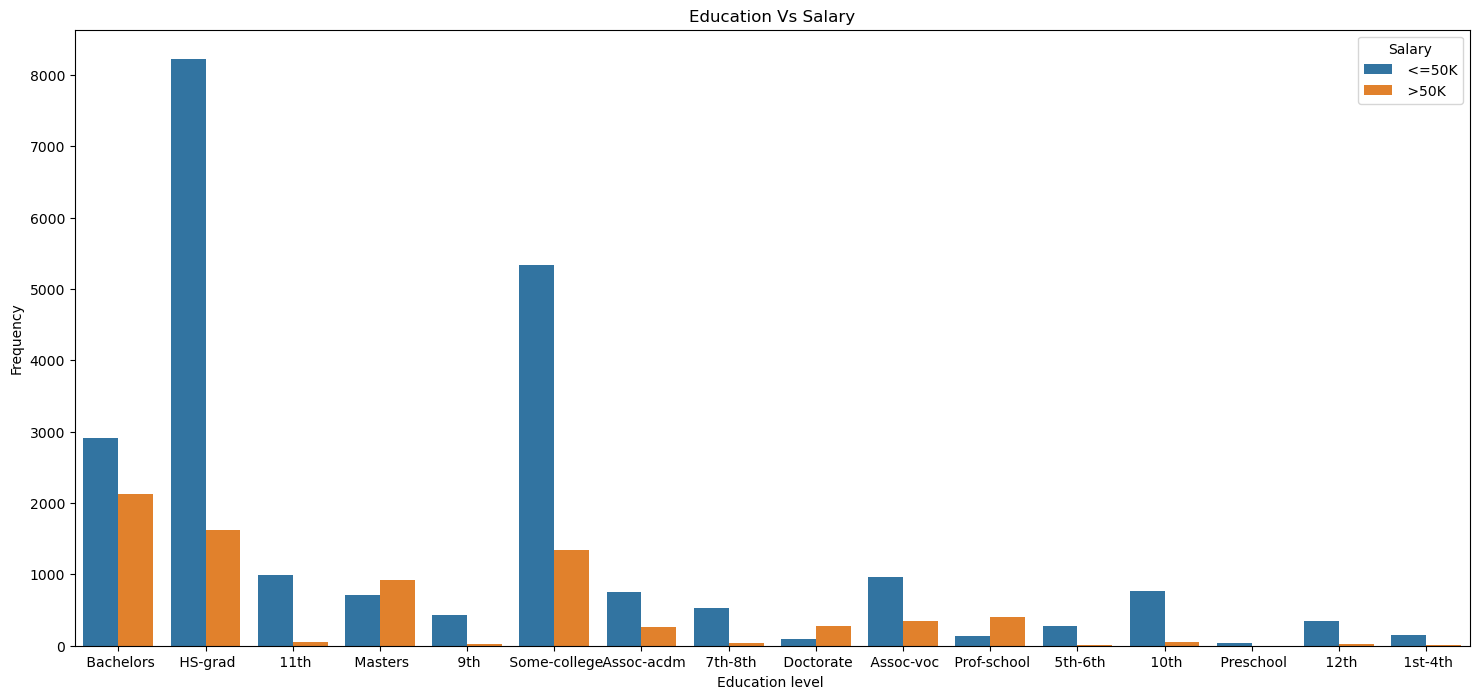

In [10]:
#Exploring Education vs Salary
fig=plt.figure(figsize=(18,8))
sns.countplot(x='education',hue='Salary',data=df)
plt.title('Education Vs Salary')
plt.xlabel('Education level ')
plt.ylabel('Frequency')
plt.show()

## Key Insights from above countplot:
1. The highest number of people having Salary <=50K are HS-grads followed by Some-college grads
2. The highest number of people are from Bachelors whose Salary is >50K 

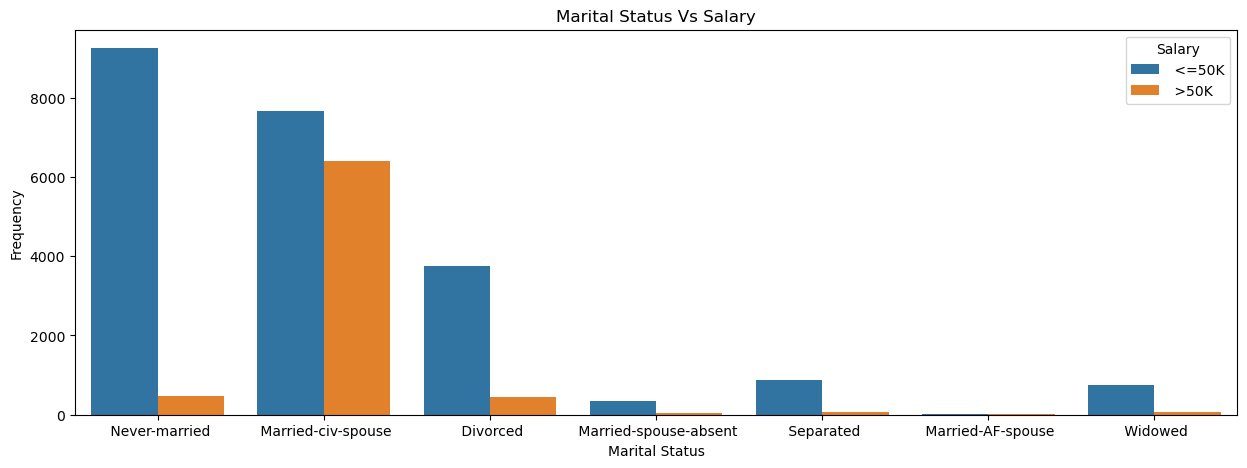

In [11]:
#Exploring Education vs Salary
fig=plt.figure(figsize=(15,5))
sns.countplot(x='maritalstatus',hue='Salary',data=df)
plt.title('Marital Status Vs Salary')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

# Insights from the above Countplot: 
1. The salary >50K for married civilian spouse
2. The salary <=50K is high for Never Married 
3. Only few persons Never married has got salary>50K

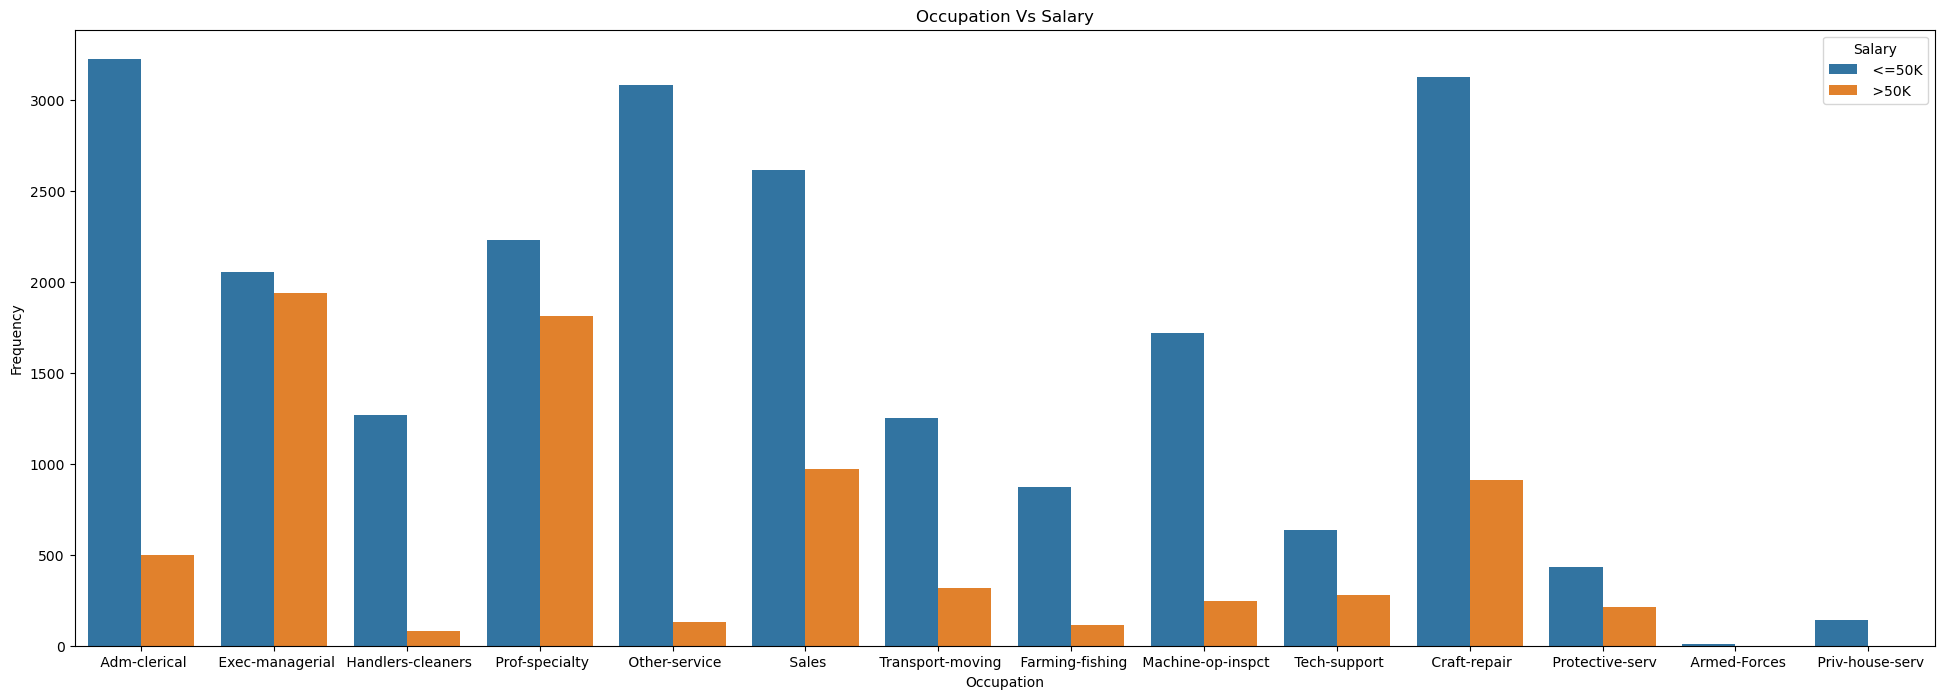

In [12]:
#Occupation vs Salary
fig=plt.figure(figsize=(24,8))
sns.countplot(x='occupation',hue='Salary',data=df)
plt.title('Occupation Vs Salary')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.show()

# Key Insights from above Countplot:
1. The highest number of persons getting Salary > 50k are Exec-managerial and Prof-speciality.
2. The Armed forces are having very less count with salary <= 50K.
3. The highest number of persons getting Salary <= 50k are Adm-clerical, Craft-repair followed by other-service

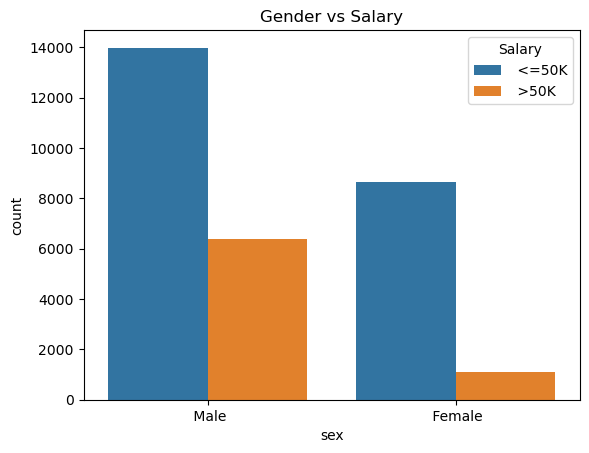

In [13]:
#Exploring Gender Vs Salary
sns.countplot(x='sex', hue='Salary', data=df)
plt.title('Gender vs Salary')
plt.show()

# Insights from the above CountPlot:
    Male category has got highest number for both salary > 50k and salary <= 50k


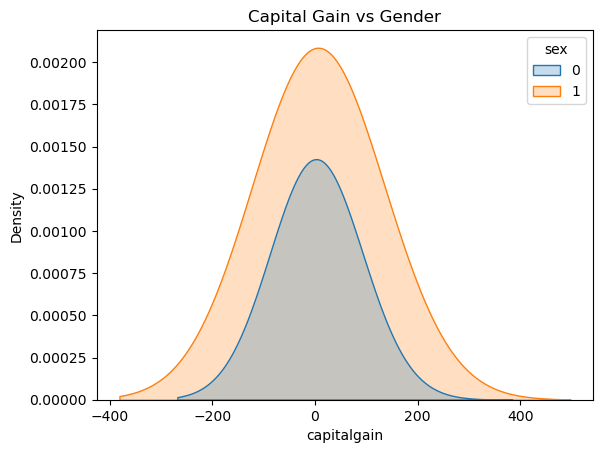

In [31]:
# Exploring CapitalGain Vs Gender
sns.kdeplot(x=df['capitalgain'], hue=df['sex'], shade=True, bw_method=5)
plt.title('Capital Gain vs Gender')
plt.show()

## Converting Categorical Variables into Numerical Variables by using LabelEncoder

In [15]:
from sklearn.preprocessing import LabelEncoder
df=df.apply(LabelEncoder().fit_transform)

## Defining Dependent and Independent variables

In [16]:
x=df.iloc[:,0:-1]
y=df.iloc[:, -1]

In [17]:
x.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,22,5,9,12,4,0,1,4,1,24,0,39,37
1,33,4,9,12,2,3,0,4,1,0,0,12,37
2,21,2,11,8,0,5,1,4,1,0,0,39,37


In [18]:
y.head(3)

0    0
1    0
2    0
Name: Salary, dtype: int32

In [19]:
test_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


# Training SVM Model with rbf Kernel

In [20]:
model=SVC(C=1.0,gamma=10,kernel='rbf',probability=True)

In [21]:
#Fit Model
model.fit(x,y)

SVC(gamma=10, probability=True)

In [22]:
# Converting Testing data categorical variables to numeric with LabelEncoder
test_data=test_data.apply(LabelEncoder().fit_transform)
x_test=test_data.iloc[:,0:-1]
y_test=test_data.iloc[:, -1]

In [23]:
y_pred=model.predict(x_test)

In [24]:
Accuracy=accuracy_score(y_pred,y_test)

In [25]:
print('The model Accuracy with rbf kernel is:',Accuracy*100)

The model Accuracy with rbf kernel is: 76.06241699867198


# Training SVM Model with Linear Kernel


In [26]:
model_linear=SVC(C=1.0,gamma=10,kernel='linear',probability=True)

In [27]:
model_linear.fit(x,y)

SVC(gamma=10, kernel='linear', probability=True)

In [28]:
y_predl=model_linear.predict(x_test)
Accuracy_linear=accuracy_score(y_predl,y_test)
Accuracy_linear

0.8041832669322709

In [29]:
print('The model Accuracy with linear kernel is:',Accuracy_linear*100)

The model Accuracy with linear kernel is: 80.41832669322709


# Training SVM Model with Sigmoid Kernel

In [30]:
model_sigmoid=SVC(C=1.0,gamma=10,kernel='sigmoid',probability=True)
model_sigmoid.fit(x,y)
y_preds=model_sigmoid.predict(x_test)
Accuracy_sigmoid=accuracy_score(y_preds,y_test)
print('The model Accuracy with sigmoid kernel is:',Accuracy_sigmoid*100)

The model Accuracy with sigmoid kernel is: 75.4316069057105


# Conclusion: 

        I have build SVM model for differnet kernels that are rbf, linear and sigmoid.
        The model accuracy with rbf kernel is 76 %.
        The model accuracy with linear kernel is 80.4 %.
        The model accuracy with sigmoid kernel is 75.4 %.
        
        The model got highest accuracy with linear kernel, Hence the best suitable kernel for SVM model is linear kernel for the given data set.